# Clasificador de dígitos por imágenes de 28x28

Realizaremos una red neuronal para identificar el número que se encuentra en una imagen de 28 x 28 píxeles. Todo este proceso será a través de una API gracias al servicio de Flask. Este servidor contendrá un formulario web en el cual se introducirá la imagen de la cual queremos obtener el número que se encuentra.

In [48]:
# Importar el dataframe de Mnist desde keras
from tensorflow.keras.datasets import mnist

# Cargar el dataset de Mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

In [49]:
import numpy as np

print(f"Datos de entrenamiento: {train_images.shape}")
print(f"Datos de prueba: {test_images.shape}")
print(f"Etiquetas de entrenamiento: {train_labels.shape}")
print(f"Etiquetas de prueba: {test_labels.shape}")
print(f"Etiquetas de las imágenes: {np.unique(train_labels)}")

Datos de entrenamiento: (60000, 28, 28)
Datos de prueba: (10000, 28, 28)
Etiquetas de entrenamiento: (60000,)
Etiquetas de prueba: (10000,)
Etiquetas de las imágenes: [0 1 2 3 4 5 6 7 8 9]


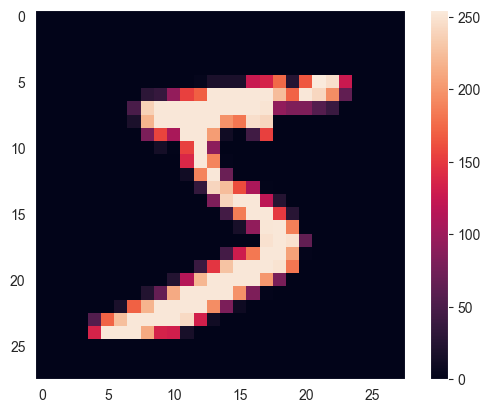

In [50]:
# Ver una imagen de ejemplo
from matplotlib import pyplot as plt

plt.figure()
plt.imshow(train_images[0]) # imshow: Muestra una imagen
plt.colorbar()
plt.grid(False)
plt.show()

In [51]:
# Modelado de la red neuronal
from tensorflow import keras
from tensorflow.keras import models

model = models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation='softmax')
])

In [52]:
# Compilación del modelo
model.compile(
    optimizer='adam', # Adam es un optimizador que se adapta a los datos
    loss='sparse_categorical_crossentropy', # Función de pérdida para clasificación
    metrics=['accuracy'] # Métrica para evaluar el modelo
)

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', # Métrica a monitorear
    patience=10, # Número de épocas sin mejora
    min_delta=0.001, # Diferencia mínima entre épocas
    restore_best_weights=True # Restaurar los mejores pesos
)

# Entrenamiento del modelo
history = model.fit(
    train_images, train_labels, # Datos de entrenamiento y etiquetas
    epochs=100, # Número de épocas para entrenar
    batch_size=128, # Tamaño del lote
    callbacks=[early_stopping], # Callbacks para el entrenamiento
    verbose=1 # Mostrar información del entrenamiento
)

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 4.4815 - accuracy: 0.8725
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.7166 - accuracy: 0.9196
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3552 - accuracy: 0.9359
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2372 - accuracy: 0.9485
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1901 - accuracy: 0.9552
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1566 - accuracy: 0.9609
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1369 - accuracy: 0.9660
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1280 - accuracy: 0.9668
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1287 - accuracy: 0.9677
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1160 - accura

In [56]:
# Evaluación del modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Precisión del modelo: {test_acc}')
print(f'Pérdida del modelo: {test_loss}')

313/313 [==============================] - 1s 3ms/step - loss: 1.1565 - accuracy: 0.9680
Precisión del modelo: 0.9679999947547913
Pérdida del modelo: 1.1564619541168213


In [57]:
# Predicción de una imagen
predictions = model.predict(test_images)
print(f'Predicción de la imagen: {np.argmax(predictions[0])}')
print(f'Etiqueta de la imagen: {test_labels[0]}')

313/313 [==============================] - 1s 2ms/step
Predicción de la imagen: 7
Etiqueta de la imagen: 7


In [58]:
# Guardar el modelo
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)